Import libraries

In [1]:
import numpy
import librosa
import librosa.display
import matplotlib.pyplot as plotlib

Import audio file, get its instantaneous amplitudes and sample rate

In [3]:
file_path = './audio/vox/0/00.wav'
instAmps, sr = librosa.load(file_path, mono=True, sr=None)
print(instAmps, sr)

[0.         0.         0.         ... 0.00259399 0.0027771  0.00289917] 44100


Get the audio file's frequency-domain info

In [4]:
magsAndPhases = librosa.stft(instAmps, n_fft=2048, hop_length=32, win_length=1024)
print(magsAndPhases)

[[-2.1105055e-02+0.0000000e+00j -2.1105429e-02+0.0000000e+00j
  -2.1115702e-02+0.0000000e+00j ...  5.3231770e-01+0.0000000e+00j
   5.4411989e-01+0.0000000e+00j  5.5148065e-01+0.0000000e+00j]
 [ 1.5706832e-02+6.0478152e-19j  1.5883783e-02-1.1837196e-03j
   1.6383972e-02-2.1647539e-03j ... -4.6183094e-01+1.7213169e-02j
  -4.6517405e-01+6.2641995e-03j -4.6609822e-01+9.9893240e-04j]
 [-3.2140026e-03-2.5410988e-21j -3.7722231e-03+2.8082349e-03j
  -5.3530307e-03+5.1916973e-03j ...  2.8207019e-01+8.6750146e-03j
   2.6621082e-01+1.0553502e-02j  2.5559649e-01+5.0749616e-03j]
 ...
 [-2.0925484e-04+1.9481758e-20j -2.0774028e-04+3.8293292e-06j
  -2.0429578e-04+6.3441926e-06j ...  4.4053397e-04+3.0920788e-04j
   5.1888137e-04+2.0469184e-04j  5.6316203e-04+7.9296704e-05j]
 [ 3.3943425e-04+1.8634725e-20j  3.3911262e-04-1.5713024e-06j
   3.3895258e-04+9.2388041e-07j ... -4.2959806e-04-1.6444827e-04j
  -4.6979185e-04-1.0662916e-04j -4.9165601e-04-4.1010589e-05j]
 [-3.9781860e-04+0.0000000e+00j -3.98557

Throw out the phase info and convert the amplitude info to dB

In [5]:
mags = numpy.abs(magsAndPhases)
magsDB = librosa.amplitude_to_db(mags, ref=numpy.max)
print(mags, magsDB)

[[2.1105055e-02 2.1105429e-02 2.1115702e-02 ... 5.3231770e-01
  5.4411989e-01 5.5148065e-01]
 [1.5706832e-02 1.5927829e-02 1.6526364e-02 ... 4.6215162e-01
  4.6521622e-01 4.6609929e-01]
 [3.2140026e-03 4.7027492e-03 7.4571213e-03 ... 2.8220356e-01
  2.6641992e-01 2.5564685e-01]
 ...
 [2.0925484e-04 2.0777556e-04 2.0439427e-04 ... 5.3821900e-04
  5.5779621e-04 5.6871737e-04]
 [3.3943425e-04 3.3911626e-04 3.3895383e-04 ... 4.5999754e-04
  4.8174075e-04 4.9336348e-04]
 [3.9781860e-04 3.9855714e-04 3.9995034e-04 ... 4.1937773e-04
  4.4279301e-04 4.5476708e-04]] [[-67.384964 -67.38481  -67.380585 ... -39.349274 -39.1588   -39.042088]
 [-69.95092  -69.82956  -69.50914  ... -40.577003 -40.519596 -40.503124]
 [-80.       -80.       -76.421265 ... -44.861443 -45.36136  -45.719883]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80. 

Plot log spectrogram

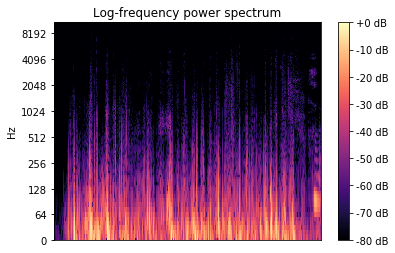

In [6]:
plotlib.title('Log-frequency power spectrum')
librosa.display.specshow(magsDB, y_axis='log')
plotlib.colorbar(format='%+2.0f dB')

Get audio file's frequency-domain info in mel form

In [7]:
melInfo = librosa.feature.melspectrogram(y=instAmps, sr=sr, n_mels=128)
print(melInfo)

[[2.31125681e-05 5.10070927e-05 5.52102464e-05 ... 1.30214823e-01
  2.30459646e-02 1.16838806e-02]
 [3.00658886e-05 5.25024188e-05 3.45792272e-05 ... 1.05890618e-01
  2.03536551e-02 5.51802996e-03]
 [1.47424464e-05 6.46603223e-06 5.60872562e-06 ... 3.67504861e-02
  2.82984991e-02 2.77564734e-02]
 ...
 [1.35157673e-08 9.65148383e-09 1.03617346e-08 ... 9.02154824e-09
  7.23050366e-09 9.66026142e-09]
 [7.44227526e-09 6.19350176e-09 7.38548967e-09 ... 1.24067797e-08
  9.23682409e-09 1.02199992e-08]
 [1.10436349e-08 1.37421621e-08 1.12312331e-08 ... 1.23140620e-08
  8.88055509e-09 6.74390011e-09]]


Convert mel info to dB

In [8]:
melDB = librosa.power_to_db(melInfo, ref=numpy.max)
print(melDB)

[[-67.85825912 -64.42043545 -64.0765443  ... -30.3501369  -37.87079224
  -40.82087006]
 [-66.71600072 -64.29494804 -66.10858833 ... -31.24816632 -38.41031704
  -44.07890061]
 [-69.81104558 -73.3903625  -74.00809921 ... -35.84411028 -36.97910713
  -37.06309829]
 ...
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]]


Plot mel spectrogram

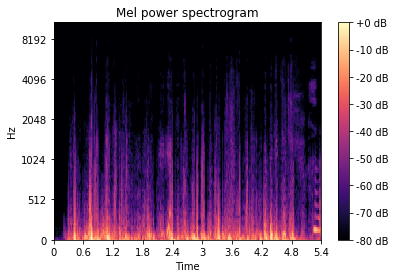

In [9]:
plotlib.title('Mel power spectrogram')
librosa.display.specshow(melDB, sr=sr, x_axis='time', y_axis='mel')
plotlib.colorbar(format='%+2.0f dB')

Separate the time-domain info into harmonic and percussive elements

In [10]:
instAmpsHarm, instAmpsPerc = librosa.effects.hpss(instAmps)
print(instAmpsHarm, instAmpsPerc)

[6.3785869e-06 5.5427186e-06 7.1540176e-06 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] [-6.3785919e-06 -5.5427199e-06 -7.1540103e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


Create a chromagram from the harmonic element

In [11]:
chroma = librosa.feature.chroma_stft(y=instAmpsHarm, sr=sr, n_chroma=12)
print(chroma)

[[0.94091579 0.96242237 0.75028966 ... 0.0152039  0.02934546 0.08519945]
 [0.91092165 0.86767728 0.64300049 ... 0.04876481 0.08030578 0.11776272]
 [0.90778342 0.81734868 0.63685163 ... 0.13360258 0.20383353 0.18703732]
 ...
 [0.77771665 0.70015895 0.88202914 ... 0.06753809 0.23762433 0.67703595]
 [0.83073661 0.81862508 0.86114231 ... 0.01657523 0.09391206 0.34576672]
 [0.88767574 0.97345927 0.92290597 ... 0.01387676 0.04009272 0.10715085]]


Plot yr chromagram

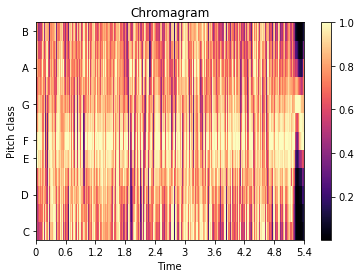

In [12]:
plotlib.title('Chromagram')
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plotlib.colorbar()